# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

  **План работы и описание проекта**

***Нам предстоит исследовать рыночную цену недвиимости квартир в Санкт-Петербурге, зависищаю от определенных параметров, таких как жилая площадь недвижимости, цена обьекта, удаленность от центра города, наличие парков и прудов рядом с обьектом и другие параметры. Цель нашего исследования - это автоматизированная система оценки недвижимости, выявляющая аномалии и мошенническую деятельность. 
Ниже приведем опсание данных(названия колонок), по которым будем проводить наше исследование.***

### Откройте файл с данными и изучите общую информацию

In [7]:
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('C:\Users\я\Downloads\real_estate_data(1).csv')
data.head(20)


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (1657709856.py, line 4)

*Изучим общую информацию о данных с помощью метода info()*

In [344]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

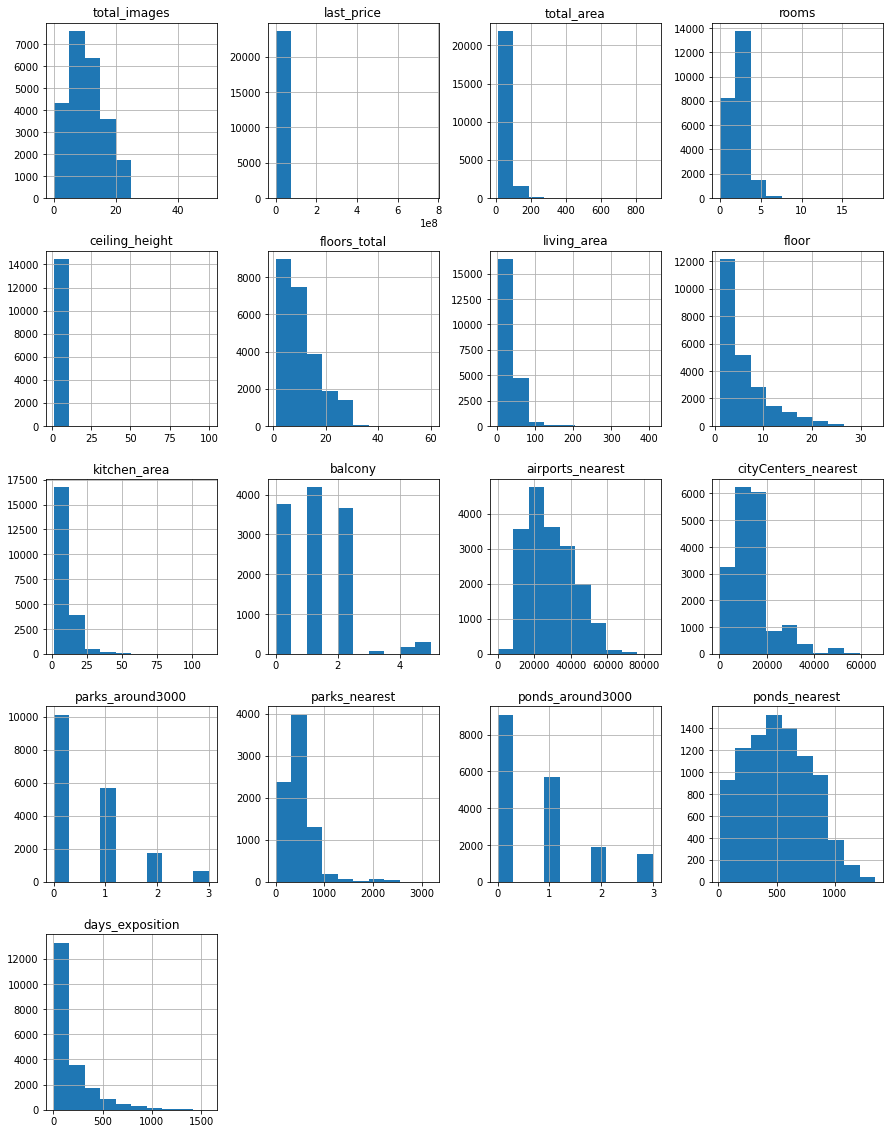

In [345]:
data.hist(figsize=(15, 20))

*изучив информацию об общих данных , можно сказать, что есть столцы с неверным типом данных(is_apartment, first_day_exposition), есть пропуски и выбросы*


### Выполните предобработку данных

*Найдем пропуски во всей таблице с помощью метода isna() и отсортируем данные по убыванию*


*приведем типы данных некоторых колонок к правильным,
is_apartment приведем к булеву типу данных, first_day_exposition к datetime*

In [346]:
data['is_apartment'] = data['is_apartment'].astype(bool)

*приведем столбец first_day_exposition к нужному формату с помощью метода to_datetime*

In [347]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

*Найдем пропуски во всей таблице с помощью метода isna() и отсортируем данные по убыванию*


In [348]:
data.isna().sum().sort_values(ascending=False)







parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
is_apartment                0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

*больше всего пропусков в  столбце - is_apartment (пачти 90% от всех значений столбца)*

*заполним пропуски в столбце is_apartment на значения False, так как у этого столбуа уже тип данных булев и скорее всего так много пропусков связано с тем, что апартаментов нету в указанных обьектах недвижимости*

In [349]:
data['is_apartment'] = data['is_apartment'].fillna('False')

*далее идут столбцы parks_nearest и ponds_nearest. Оставим все так как есть, потомучто пропуски в этих столбцах не повлияют на наше исследование*

*далее посмотрим пропуски в столбце balcony. их около 50%*

*заполним пропуски в столбце balcony нулем, потомучто скорее всего у данных обьектов недвижимости нету балконов*



In [350]:
data['balcony'].fillna('0')

0          0
1        2.0
2        0.0
3        0.0
4          0
        ... 
23694      0
23695      0
23696      0
23697    2.0
23698      0
Name: balcony, Length: 23699, dtype: object

*далее посмотрим ункальные значения стобца ceiling_height*

*столбец ceiling_height, по данным мы видим, что количество пропусков в данном столбце 9195, что составляет примерно 10% от всех пропусков в таблице.
Это много, поэтому пренебрегать ими нельзя, лучше заполнить медианным значением. Но сначала выведем на экран уникальные значения столбца*

In [351]:
data.sort_values(by='ceiling_height', ascending=False).isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

*в столбце ceoling_height - 9195 пропусков или 9195/23699 = 38,79% - это больше 10% поэтому удалять не будем а лучше заменим медианой*

*из таблицы видно, что есть несколько недостоверных значений, не отражающих действительность, например высота в 8 метров или 100 метров.
Преобразуем данные к нормальному значению. Скорее всего люди ошиблись в запятой после целой части, поэтому разделим такие значения на 10.*

*так как высота потолков не может быть менее двух метров, найдем значения, которые больше 20, и разделим их на 10*

In [352]:
data['ceiling_height'] = data.loc[data['ceiling_height'] > 20.0, 'ceiling_height'] / 10

*видим, что теперь картина более реальна, но всеравно остается лишнее значение в 10м. Заменим его на медианное.*

*заполним пропуски медианой равной 2.7м*

In [353]:
data['ceiling_height'].isna().sum()

23677

In [354]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

*airports_nearest - пропуков примерно 20%, но оставляем все так как есть,так как аэропортов рядом скорее всего нет и данные пропуски нам не помешают в ходе исследования*

*пропусков в столбце cityCenters_nearest много (около 20%), заменим медианным значением, чтобы избежать искажений в данных*

In [355]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median())

*пропуски в столбцах ponds_around3000, parks_around3000, days_exposition, kitchen_area, не меняем, оставляем как есть.*

**начнем c со столбца ceiling_height,
по данным мы видим, что количество пропусков в данном столбце 9195, что составляет примерно 10% от всех пропусков в таблице
Это много, поэтому пренебрегать ими нельзя, лучше заполнить медианным значением. Но сначала выведем на экран уникальные значения столбца**

*в столбцах parks_nearest и ponds_nearest также много пропусков, но скорее всего потомучто рядом нету ни парков ни водоемов, поэтому оставим эти пропуски без изменений. Остальных еще меньше, и их также оставим без изменений.*

**рассмотрим дубликаты в данных**

In [356]:
data.duplicated().sum()

0

In [357]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = (
data['locality_name']
.str.replace('ё', 'е')
    .replace(['поселок', 'платформа', 'при железнодорожной станции', 'садоводческое некоммерческое товарищество ',
             'садовое товарищество ', 'станции', 'село', 'пансионат ', 'городского типа ',
             'деревня ', 'городской поселок '], '', regex=True)
)
set(data['locality_name'].unique())


{'  69-й километр',
 '  вещево',
 '  громово',
 '  корнево',
 '  лужайка',
 '  приветнинское',
 '  свирь',
 ' александровская',
 ' алексеевка',
 ' аннино',
 ' барышево',
 ' белоостров',
 ' большая ижора',
 ' бугры',
 ' важины',
 ' вознесенье',
 ' возрождение',
 ' войсковицы',
 ' войскорово',
 ' володарское',
 ' вырица',
 ' высокоключевой',
 ' гаврилово',
 ' гарболово',
 ' гладкое',
 ' глажево',
 ' глебычево',
 ' гончарово',
 ' громово',
 ' дзержинского',
 ' дружная горка',
 ' дружноселье',
 ' дубровка',
 ' елизаветино',
 ' ефимовский',
 ' жил',
 ' жилгородок',
 ' житково',
 ' заводской',
 ' запорожское',
 ' зеленый бор',
 ' зимитицы',
 ' ильичево',
 ' имени морозова',
 ' имени свердлова',
 ' калитино',
 ' каложицы',
 ' кикерино',
 ' кингисеппский',
 ' кирпичное',
 ' кобралово',
 ' кобринское',
 ' коммунары',
 ' кондратьево',
 ' копорье',
 ' коробицыно',
 ' котельский',
 ' красная долина',
 ' красносельское',
 ' красный бор',
 ' кузнечное',
 ' кузьмоловский',
 ' лебяжье',
 ' левашово',


### Добавьте в таблицу новые столбцы

*добавим новый столбец - цена одного квадратного метра и округлим значения до 2х знаков после запятой*

In [358]:
data['one_metr_price'] = round(data['last_price'] / data['total_area'], 2)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_metr_price
0,20,13000000.0,108.00,2019-03-07,3,2.7,16.0,51.00,8,True,...,NaN,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37
1,7,3350000.0,40.40,2018-12-04,1,2.7,11.0,18.60,1,True,...,2.0,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79
2,10,5196000.0,56.00,2015-08-20,2,2.7,5.0,34.30,4,True,...,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71
3,0,64900000.0,159.00,2015-07-24,3,2.7,14.0,NaN,9,True,...,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10
4,2,10000000.0,100.00,2018-06-19,2,2.7,14.0,32.00,13,True,...,NaN,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00
5,10,2890000.0,30.40,2018-09-10,1,2.7,12.0,14.40,5,True,...,NaN,городской янино-1,NaN,13098.5,NaN,NaN,NaN,NaN,55.0,95065.79
6,6,3700000.0,37.30,2017-11-02,1,2.7,26.0,10.60,6,True,...,1.0,парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.71
7,5,7915000.0,71.60,2019-04-18,2,2.7,24.0,NaN,22,True,...,2.0,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.69
8,20,2900000.0,33.16,2018-05-23,1,2.7,27.0,15.43,26,True,...,NaN,мурино,NaN,13098.5,NaN,NaN,NaN,NaN,189.0,87454.76
9,18,5400000.0,61.00,2017-02-26,3,2.7,9.0,43.60,7,True,...,2.0,санкт-петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.59


*добавим новый столбец weekday по условию задачи*

In [359]:
data['weekday'] = data['first_day_exposition'].dt.weekday

*аналогично добавляем столбцы month и year*

In [360]:
data['month'] = data['first_day_exposition'].dt.month

In [361]:
data['year'] = data['first_day_exposition'].dt.year

*добавляем новый столбец type_floor со значениями 'первый', 'последний', 'другой'*

In [362]:
def floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor, axis=1)


*добавляем столбец - 'расстояние до центра в км'.*

In [363]:
data['distance_city_centers'] = round(data['cityCenters_nearest'] / 1000, 0)

*переводим метры в км и округляем до ближайшего целого числа*

In [364]:
display(data.head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_metr_price,weekday,month,year,floor_type,distance_city_centers
0,20,13000000.0,108.00,2019-03-07,3,2.7,16.0,51.00,8,True,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.7,11.0,18.60,1,True,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.7,5.0,34.30,4,True,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.7,14.0,NaN,9,True,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,2.7,14.0,32.00,13,True,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.7,12.0,14.40,5,True,...,NaN,NaN,NaN,55.0,95065.79,0,9,2018,другой,13.0
6,6,3700000.0,37.30,2017-11-02,1,2.7,26.0,10.60,6,True,...,NaN,0.0,NaN,155.0,99195.71,3,11,2017,другой,19.0
7,5,7915000.0,71.60,2019-04-18,2,2.7,24.0,NaN,22,True,...,NaN,0.0,NaN,NaN,110544.69,3,4,2019,другой,12.0
8,20,2900000.0,33.16,2018-05-23,1,2.7,27.0,15.43,26,True,...,NaN,NaN,NaN,189.0,87454.76,2,5,2018,другой,13.0
9,18,5400000.0,61.00,2017-02-26,3,2.7,9.0,43.60,7,True,...,NaN,0.0,NaN,289.0,88524.59,6,2,2017,другой,15.0


In [365]:
data['floor_type'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

### Проведите исследовательский анализ данных

In [366]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

*построим гистограмму столбца общей жилой площади total_area*

<function matplotlib.pyplot.show(close=None, block=None)>

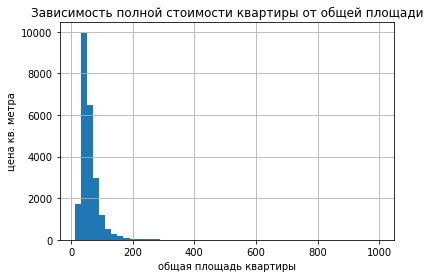

In [367]:
data['total_area'].hist(bins=50, range=(12, 1000))
plt.title('Зависимость полной стоимости квартиры от общей площади')
plt.xlabel('общая площадь квартиры')
plt.ylabel('цена кв. метра')
plt.show




*видим, что больше всего квартиры стоят с общей площадью 50кв.м (стоимость 100000 кв.м.), меньше всего с площадью 12кв.м.*

*будем считать выбросами все значения, которые более 200кв.м.*

In [368]:
(len(data.query('total_area > 200')))

227

*227/23699 = 0,95% процентов выбросов , это менее 10% поэтому можно удалить*

In [369]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

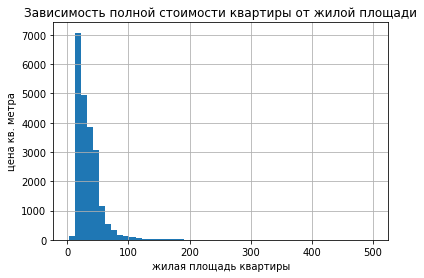

In [370]:
data['living_area'].hist(bins=50, range=(2, 500))
plt.title('Зависимость полной стоимости квартиры от жилой площади')
plt.xlabel('жилая площадь квартиры')
plt.ylabel('цена кв. метра')
plt.show

**видим, что больше всего квартир с жилой площадью около 30кв.м. стоимостью примерно 40000 - 50000 за кв.м., это подтверждается средним значением в 34кв.м., есть выбросы - это значения более 125. Проверим можно ли их удалить**

In [371]:
data[data['living_area'] > 125]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_metr_price,weekday,month,year,floor_type,distance_city_centers
155,8,96000000.0,317.0,2017-07-07,4,2.7,3.0,183.0,3,True,...,508.0,3.0,366.0,62.0,302839.12,4,7,2017,последний,2.0
417,5,14200000.0,178.0,2017-10-26,5,2.7,4.0,126.6,2,True,...,NaN,3.0,257.0,104.0,79775.28,3,10,2017,другой,3.0
464,15,66571000.0,280.3,2015-06-11,6,2.7,8.0,159.5,7,True,...,187.0,1.0,616.0,578.0,237499.11,3,6,2015,другой,7.0
509,5,90000000.0,225.0,2016-06-26,6,2.7,4.0,134.0,2,True,...,NaN,2.0,519.0,416.0,400000.00,6,6,2016,другой,6.0
521,20,25717300.0,230.1,2015-01-21,3,2.7,3.0,130.0,1,True,...,676.0,3.0,278.0,1441.0,111765.75,2,1,2015,первый,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22965,19,35000000.0,236.0,2019-03-26,6,2.7,5.0,164.3,2,True,...,243.0,1.0,827.0,18.0,148305.08,1,3,2019,другой,9.0
23005,20,30750000.0,297.5,2018-09-09,6,2.7,4.0,181.8,2,True,...,189.0,3.0,40.0,42.0,103361.34,6,9,2018,другой,1.0
23091,20,33000000.0,186.0,2017-10-11,3,2.7,5.0,130.0,3,True,...,NaN,0.0,NaN,138.0,177419.35,2,10,2017,другой,3.0
23400,17,30000000.0,213.0,2017-09-28,7,2.7,5.0,151.4,5,True,...,342.0,3.0,30.0,299.0,140845.07,3,9,2017,последний,1.0


197/23699 = 0,8 процента. Это менее 10%. Можно удалить

In [372]:
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

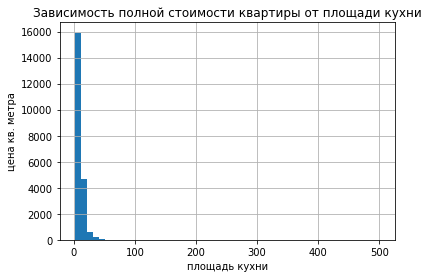

In [373]:
data['kitchen_area'].hist(bins=50, range=(2, 500))
plt.title('Зависимость полной стоимости квартиры от площади кухни')
plt.xlabel('площадь кухни')
plt.ylabel('цена кв. метра')
plt.show()

**наибольшая зависимость наблюдается при количестве кв с плошадью кухонь 10-15кв , полная стоимость при этом ранв около 160000 за кв.м. Выбросами можно считать все, что больше 50, проверим можно ли их удалить**

In [374]:
len(data.query('kitchen_area > 50')) / 23699 * 23699

46.0

**итого 0.1 процента. Удаляем**

In [375]:
data['living_area'].describe()


count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

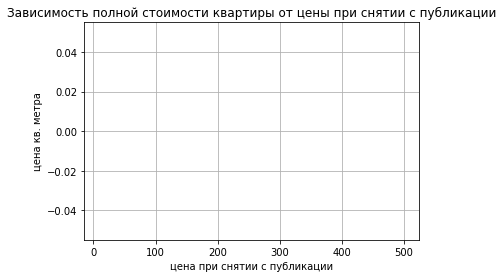

In [376]:
data['last_price'].hist(bins=10, range=(10, 500))
plt.title('Зависимость полной стоимости квартиры от цены при снятии с публикации')
plt.xlabel('цена при снятии с публикации')
plt.ylabel('цена кв. метра')
plt.show()

In [377]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

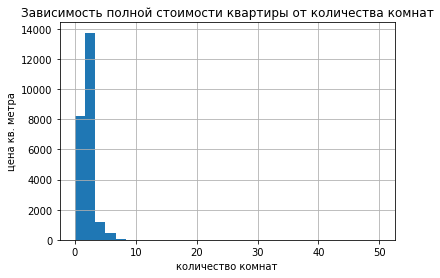

In [378]:
data['rooms'].hist(bins=30, range=(0, 50))
plt.title('Зависимость полной стоимости квартиры от количества комнат')
plt.xlabel('количество комнат')
plt.ylabel('цена кв. метра')
plt.show()


*максимальная полная стоимость квартиры(140000) наблюдается при 2х комнатах. Есть выбросы - всеб что более 7комнат*

In [379]:
len(data.query('rooms > 7'))/23699
            

0.0013080720705515002

**Выбросов получилось 63.5 процентов, что значительно больше 10% от всего датафрейма. Значит удалять нельзя.**

In [380]:
data['floor_type'].describe()

count      23699
unique         3
top       другой
freq       17446
Name: floor_type, dtype: object

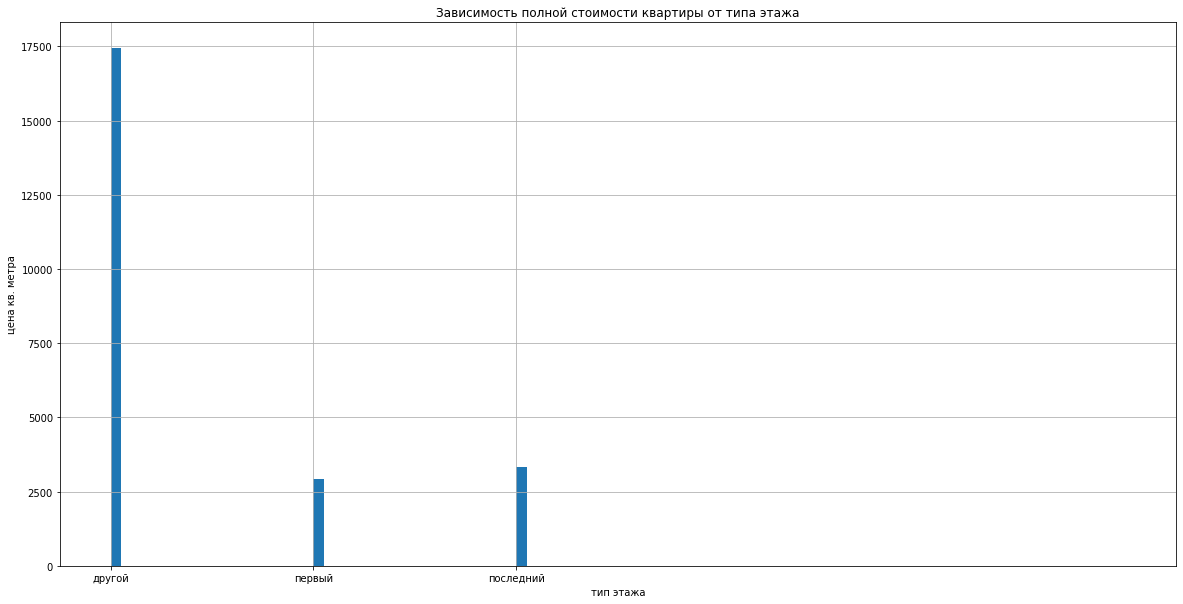

In [381]:
data['floor_type'].hist(bins=100, figsize=(20, 10), range=(0, 5))
plt.title('Зависимость полной стоимости квартиры от типа этажа')
plt.xlabel('тип этажа')
plt.ylabel('цена кв. метра')
plt.show()

*меньше всего зависимость наблюдается при квартирах, находящихся на первом и последнем этажах. Люди выбирают чаще "другие" этажи.*

<AxesSubplot:>

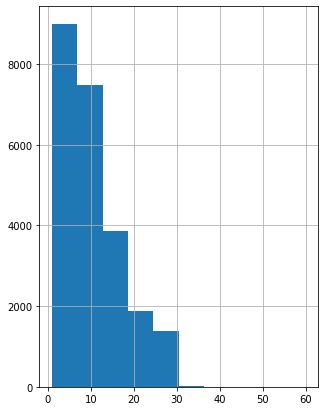

In [382]:
data['floors_total'].hist(figsize=(5,7))

In [383]:
data['floors_total'] = data.loc[data['floors_total'] < 30]

<AxesSubplot:>

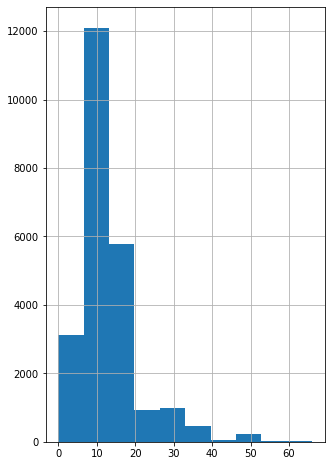

In [384]:
data['distance_city_centers'].hist(figsize=(5, 8))

In [385]:
data.loc[data['distance_city_centers'] < 51500, 'distance_city_centers']

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23694     4.0
23695    13.0
23696    13.0
23697    10.0
23698    13.0
Name: distance_city_centers, Length: 23699, dtype: float64

<AxesSubplot:>

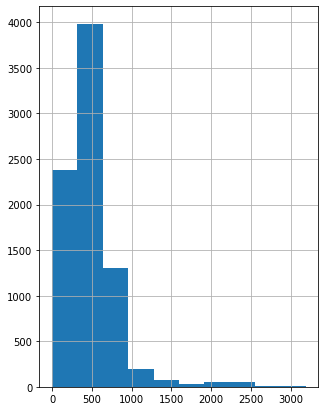

In [386]:
data['parks_nearest'].hist(figsize=(5, 7))


In [387]:
data.loc[data['parks_nearest'] > 2100, 'parks_nearest'].count()

109

*удаляем выбросы, значения которых более 2100*

*изучим столбец days_exposition и выясним как долго продавались квартиры, построим гистограмму и найдем среднеее и медиану*

In [388]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

95.0

180.88863436982163

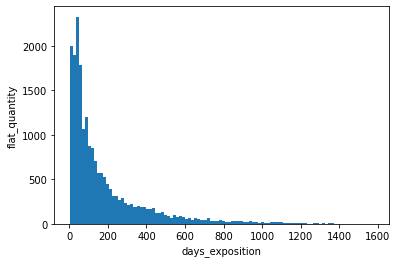

In [389]:
plt.hist(data['days_exposition'],bins=100, range=(1, 1580))
plt.xlabel('days_exposition')
plt.ylabel('flat_quantity')
plt.show
display(data['days_exposition'].median())
display(data['days_exposition'].mean())


***судя по графику некоторые квартиры продавались очень долго, более 2х лет -я бы назвал такие продажжи необычно долгими, хотя среднее значение 180дней. Необычно быстрыми продажми можно назвать продажи менее медианного значения тоеть менее 95 дней. Таких квартир много, больше половины***

**я написал же что необычно быстрыми продажами можно считать продажы менее либо равно 7 дней. А долгими более полугода. Тут есть вопросы?**

<AxesSubplot:>

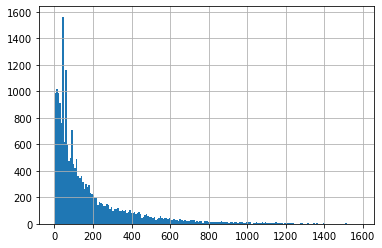

In [390]:
data['days_exposition'].hist(bins=200)

<AxesSubplot:>

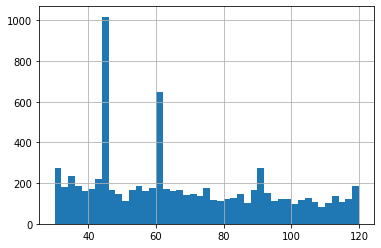

In [391]:
data['days_exposition'].hist(bins=45, range=(30, 120))

<AxesSubplot:>

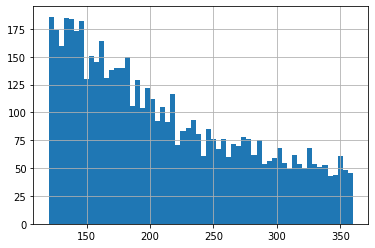

In [392]:
data['days_exposition'].hist(bins=60, range=(120, 360))

**посчитаем выбросы - это все, что менее 7 дней и более 360 дней**

In [393]:
data_days_exposition = data.query('7 <= days_exposition <= 360')
print(data_days_exposition['days_exposition'].describe())

count    16777.000000
mean       107.416344
std         87.737441
min          7.000000
25%         42.000000
50%         78.000000
75%        156.000000
max        359.000000
Name: days_exposition, dtype: float64


**Среднее значение 107 дней, медиана 78. Обычно квартиры в мегаполисах продаются окоо 40-120 дней, иногда продажи могут затянуться от полугода до года. В нашем случае большинство продаж находится в средней диапазоне 4- 120 дней. Менее 7 дней можно считать необычно быстрыми продажами - это в основном мошеннические схемы. а необычно долгими продажами можно считать продажи свыше 365 дней.**

<AxesSubplot:>

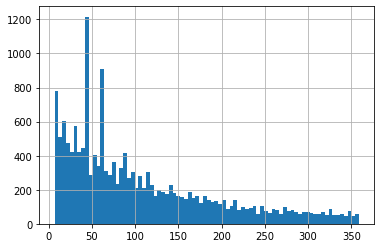

In [394]:
data_days_exposition['days_exposition'].hist(bins=80)

<AxesSubplot:>

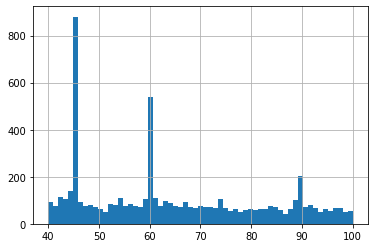

In [395]:
data_days_exposition['days_exposition'].hist(bins=61, range=(40, 100))

**Много квартир продается за 45 и 60 дней. Так же есть локальный пик в 90 дней. Имеются техники риэлторов , которые продают квартиры за 45, 60 или 90 дней как главное правильно своей работы.

Проведем удаление выбросов по дням продажи. Возьмем за левую границу 7 дней, за правую - правую границу в по квантилям 496.**

In [396]:
new_data = data.shape[0]
data = data.query('7 <= days_exposition <= 496')
print('Количество значений до обработки', new_data)
print('Количество значений поле обработки', data.shape[0])
print('процент удленных данных', '{:.2%}'.format (
    (new_data - data.shape[0])/new_data))

Количество значений до обработки 23699
Количество значений поле обработки 18130
процент удленных данных 23.50%


In [397]:
data_vibrosi = 23699 - 472
print('Количество значений до удаления выбросов:', data.shape[0])
print('Количество значений до удаления выбросов:', (data_vibrosi))
print('Процент удаленных данных:', '{:.2%}'.format((data.shape[0] - data_vibrosi) / data.shape[0]))

Количество значений до удаления выбросов: 18130
Количество значений до удаления выбросов: 23227
Процент удаленных данных: -28.11%


*Определим зависимость цены квартиры от ее параметров

        *нашли среднее и медиану, самые долгие продажи это значения около 1580 дней, самые быстрые 1 день*

**изучим влияние разных параметров на тоимость квартиры**. Для этого построим орреляционные зависимости между этми параметрами**

In [398]:
data_price_metr = data.loc[:,['total_area', 'living_area', 'kitchen_area', 'one_metr_price', 'rooms', 'ceiling_height', 'floor_type', 'floors_total', 'cityCenters_nearest', 'parks_nearest']
                          ]
data_price_metr.corr()

,total_area,living_area,kitchen_area,one_metr_price,rooms,ceiling_height,cityCenters_nearest,parks_nearest
total_area,1.000000,0.936413,0.606251,0.289400,0.761122,-0.006714,-0.193220,0.000727
living_area,0.936413,1.000000,0.421291,0.208522,0.846625,-0.006491,-0.193548,-0.032767
kitchen_area,0.606251,0.421291,1.000000,0.375329,0.260434,0.001358,-0.162149,0.054052
one_metr_price,0.289400,0.208522,0.375329,1.000000,0.042512,0.080010,-0.243472,0.030214
rooms,0.761122,0.846625,0.260434,0.042512,1.000000,-0.006516,-0.148926,-0.038091
ceiling_height,-0.006714,-0.006491,0.001358,0.080010,-0.006516,1.000000,-0.005197,-0.010033
cityCenters_nearest,-0.193220,-0.193548,-0.162149,-0.243472,-0.148926,-0.005197,1.000000,-0.055129
parks_nearest,0.000727,-0.032767,0.054052,0.030214,-0.038091,-0.010033,-0.055129,1.000000


array([[<AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='one_metr_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='ceiling_height', ylabel='total_area'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='total_area'>,
        <AxesSubplot:xlabel='parks_nearest', ylabel='total_area'>],
       [<AxesSubplot:xlabel='total_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='one_metr_price', ylabel='living_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='living_area'>,
        <AxesSubplot:xlabel='ceiling_height', ylabel='living_area'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='living_area'>,

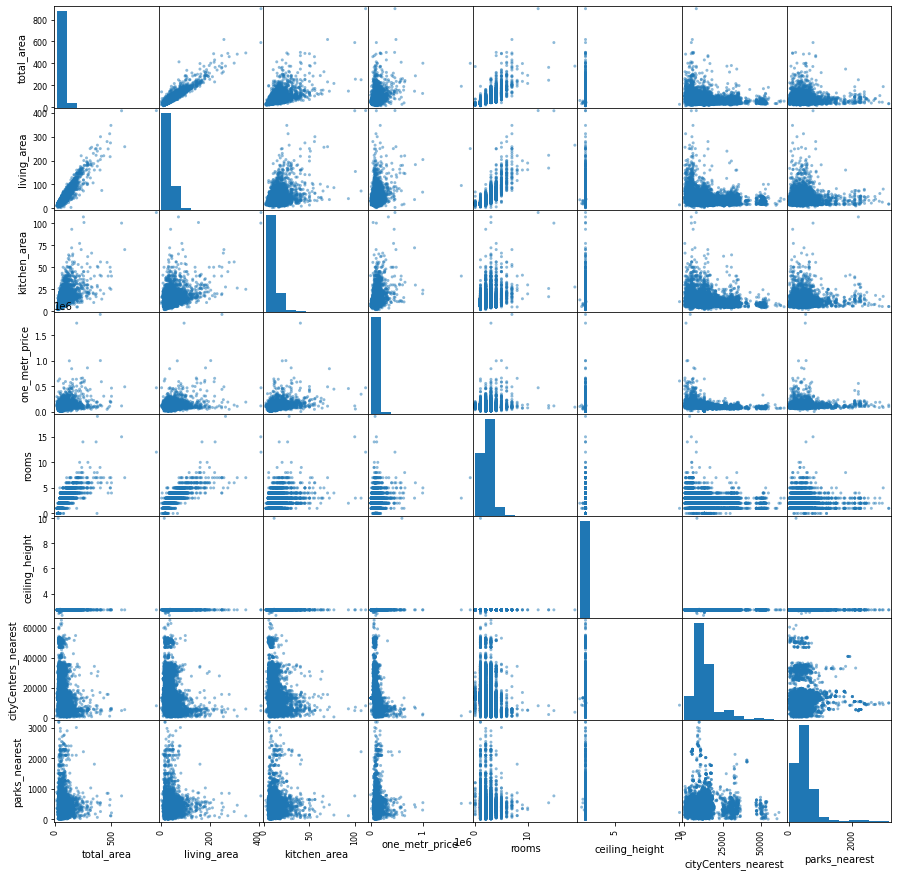

In [399]:
pd.plotting.scatter_matrix(data_price_metr, figsize=(15, 15))

** Из матрицы корреляций видно, что зависимость цены квартиры от общей, жилой и площади кухни, незначительная. Количество комнат влияет чуть сильнее но тоже незначительно. Расстояние до центра города влияет отрицательно, но не сильно. Количество парков рядом**

count      2182.000000
mean      79980.784982
std       32563.027544
min        9615.380000
25%       60893.902500
50%       80283.780000
75%       96552.797500
max      390625.000000
Name: one_metr_price, dtype: float64


<AxesSubplot:>

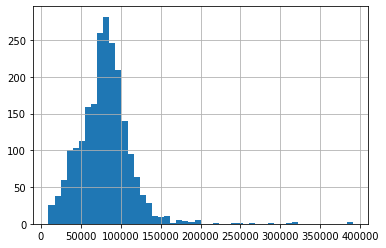

In [400]:
print(data[data['floor_type'] == 'первый']['one_metr_price'].describe())
data[data['floor_type'] == 'первый']['one_metr_price'].hist(bins=50)

**квариры на первом этаже не сильно популярны. больше сего квартир продано по цене за 75000р. кв.м. Их около 250.**

count    2.463000e+03
mean     9.178236e+04
std      6.396959e+04
min      1.118300e+02
25%      6.521037e+04
50%      8.717949e+04
75%      1.065426e+05
max      1.907500e+06
Name: one_metr_price, dtype: float64


<AxesSubplot:>

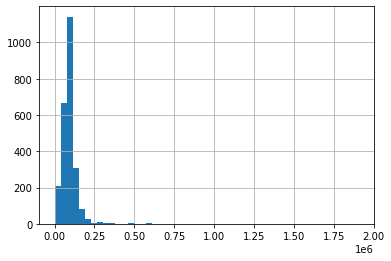

In [401]:
print(data[data['floor_type'] == 'последний']['one_metr_price'].describe())
data[data['floor_type'] == 'последний']['one_metr_price'].hist(bins=50)

**видно что больше всего квартир а это около 1000штук продано по средней цене в 125000р**

count    1.348500e+04
mean     1.011049e+05
std      4.410089e+04
min      1.036866e+04
25%      8.056716e+04
50%      9.688196e+04
75%      1.145553e+05
max      1.736842e+06
Name: one_metr_price, dtype: float64


<AxesSubplot:>

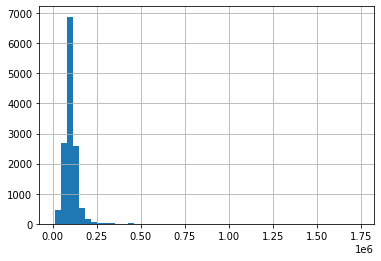

In [402]:
print(data[data['floor_type'] == 'другой']['one_metr_price'].describe())
data[data['floor_type'] == 'другой']['one_metr_price'].hist(bins=50)

**средняя цена на других этажах примерно такаяже как на поледнем но квартир продано больше вв 7 раз, чем на последнем.**

In [403]:
price_w_m_y = data.loc[:,['one_metr_price', 'weekday', 'month', 'year']]
print(price_w_m_y)

       one_metr_price  weekday  month  year
1            82920.79        1     12  2018
3           408176.10        4      7  2015
4           100000.00        1      6  2018
5            95065.79        0      9  2018
6            99195.71        3     11  2017
...               ...      ...    ...   ...
23689       100566.57        2      2  2018
23690       105769.23        3      7  2018
23692        45000.00        4      7  2017
23693        73717.95        4      8  2016
23695        52542.37        0      1  2018

[18130 rows x 4 columns]


In [404]:
price_w_m_y.corr()

,one_metr_price,weekday,month,year
one_metr_price,1.000000,0.000485,0.003538,0.019435
weekday,0.000485,1.000000,0.009961,-0.004569
month,0.003538,0.009961,1.000000,-0.218814
year,0.019435,-0.004569,-0.218814,1.000000


**зависимости слабые**

count      2727.000000
mean      97183.105955
std       43155.599490
min       10561.800000
25%       76660.470000
50%       93750.000000
75%      110956.790000
max      857542.880000
Name: one_metr_price, dtype: float64


<AxesSubplot:>

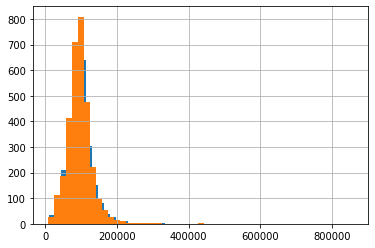

In [423]:
print(price_w_m_y[price_w_m_y['weekday'] == 0]['one_metr_price'].describe())
price_w_m_y[price_w_m_y['weekday'] == 0]['one_metr_price'].hist(bins=50)
price_w_m_y[price_w_m_y['weekday'] == 1]['one_metr_price'].hist(bins=50)


<AxesSubplot:>

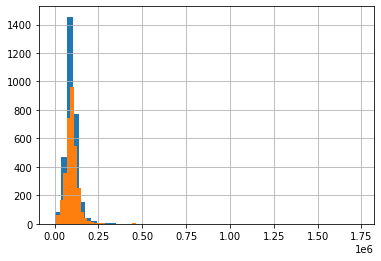

In [424]:
price_w_m_y[price_w_m_y['weekday'] == 2]['one_metr_price'].hist(bins=50)
price_w_m_y[price_w_m_y['weekday'] == 3]['one_metr_price'].hist(bins=50)

<AxesSubplot:>

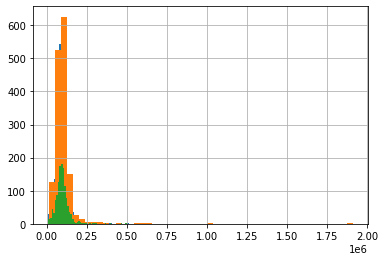

In [425]:
price_w_m_y[price_w_m_y['weekday'] == 4]['one_metr_price'].hist(bins=50)
price_w_m_y[price_w_m_y['weekday'] == 5]['one_metr_price'].hist(bins=50)
price_w_m_y[price_w_m_y['weekday'] == 6]['one_metr_price'].hist(bins=50)

**видно что больше всего квартир продают в будни когда идет рабочая неделя у большинства**

<AxesSubplot:>

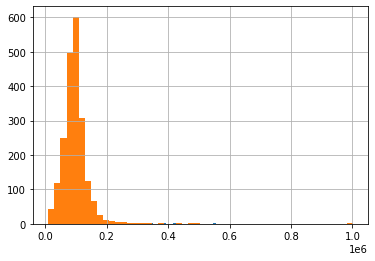

In [406]:
price_w_m_y[price_w_m_y['month'] == 1]['one_metr_price'].hist(bins=50)
price_w_m_y[price_w_m_y['month'] == 2]['one_metr_price'].hist(bins=50)

     

<AxesSubplot:>

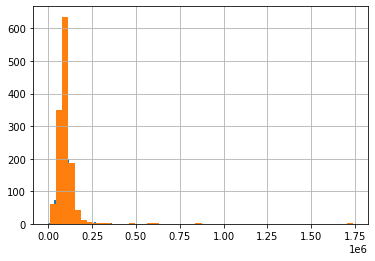

In [407]:
price_w_m_y[price_w_m_y['month'] == 3]['one_metr_price'].hist(bins=50)
price_w_m_y[price_w_m_y['month'] == 4]['one_metr_price'].hist(bins=50)

<AxesSubplot:>

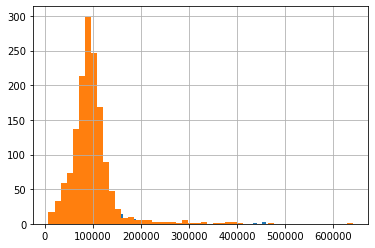

In [408]:
price_w_m_y[price_w_m_y['month'] == 5]['one_metr_price'].hist(bins=50)
price_w_m_y[price_w_m_y['month'] == 6]['one_metr_price'].hist(bins=50)

<AxesSubplot:>

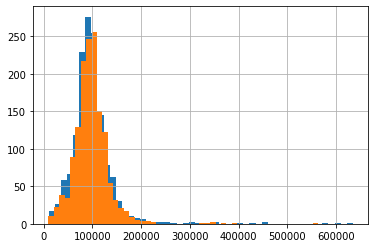

In [409]:
price_w_m_y[price_w_m_y['month'] == 7]['one_metr_price'].hist(bins=50)
price_w_m_y[price_w_m_y['month'] == 8]['one_metr_price'].hist(bins=50)

<AxesSubplot:>

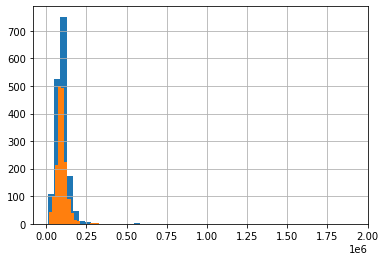

In [410]:
price_w_m_y[price_w_m_y['month'] == 9]['one_metr_price'].hist(bins=50)
price_w_m_y[price_w_m_y['month'] == 10]['one_metr_price'].hist(bins=50)

<AxesSubplot:>

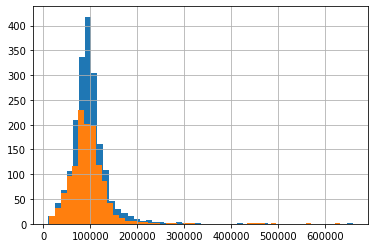

In [411]:
price_w_m_y[price_w_m_y['month'] == 11]['one_metr_price'].hist(bins=50)
price_w_m_y[price_w_m_y['month'] == 12]['one_metr_price'].hist(bins=50)
     

**по месяцам примерно одинакоая ситуация, но меньше всего в декабреи январе, видимо из за новогодних праздников**

<AxesSubplot:>

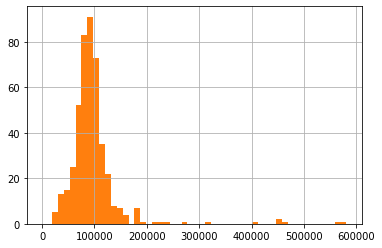

In [428]:
price_w_m_y[price_w_m_y['year'] == 2014]['one_metr_price'].hist(bins=50)
price_w_m_y[price_w_m_y['year'] == 2015]['one_metr_price'].hist(bins=50)

In [ ]:
price_w_m_y[price_w_m_y['year'] == 2016]['one_metr_price'].hist(bins=50)
price_w_m_y[price_w_m_y['year'] == 2017]['one_metr_price'].hist(bins=50)

<AxesSubplot:>

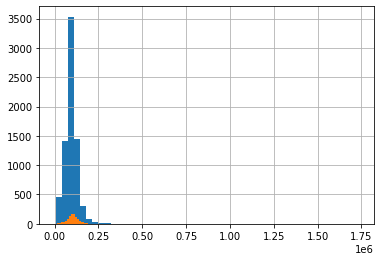

In [429]:
price_w_m_y[price_w_m_y['year'] == 2018]['one_metr_price'].hist(bins=50)
price_w_m_y[price_w_m_y['year'] == 2019]['one_metr_price'].hist(bins=50)

<AxesSubplot:xlabel='total_area'>

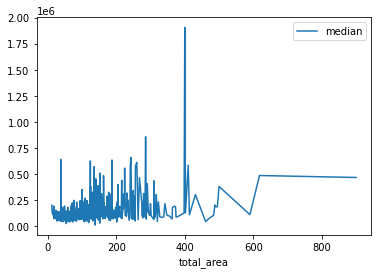

In [412]:
total_area_to_price = data.pivot_table(index='total_area', values='one_metr_price', aggfunc = ['mean', 'count', 'median'])
total_area_to_price.columns = ['mean', 'count', 'median']
total_area_to_price.sort_values(by='median', ascending=False)
total_area_to_price.plot(y='median')



*Наблюдаем незначительную зависимость между общей площадью и ценй кв метра в горизонтальном коридоре со значениями площади квартиры от 10 до 40 при цене за кв метр = от 100000р до 600000р, при этом есть значительные аномалии цены при значениях общей площади в 20, 28 и 40 квюметров. Далее картина меняется - начиная со значения общей площади от 60квадратов цена начинает резко расти от 150 до 550тыс/кв.м, , но потом со значения площади примерно от 62 до 63 мы наблюдаем небольшую корректировку цены д0 200тыс. и затем снова рост линейной зависимости цены от площади со значениями площади от 63 до 90 цена растет от 200тыс до 450тыс. Можно сделать вывод, что при общей площади квартиры от 10 до 60 кв.м. значительной зависимости цены от площади мы не наблюдаем. Прямая зависимость видна при значениях площади от 63кв.м и выше.

<AxesSubplot:xlabel='living_area'>

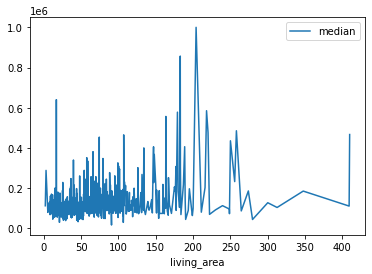

In [413]:
living_area_to_price = data.pivot_table(index='living_area', values='one_metr_price', aggfunc = ['mean', 'count', 'median'])
living_area_to_price.columns = ['mean', 'count', 'median']
living_area_to_price.sort_values(by='median', ascending=False)
living_area_to_price.plot(y='median')                            

6676Из графика видно, что цена квартиры пачти не меняется при значениях жилой площади от 0 до 10кв.м, затем наблюдается плавный рост зависимости при значениях жилой площади от 10 до 20 квадратов цена растет от 90т.р. до 110т.р. Зависимость наблюдается при значениях, начиная от 30кв.м до 37кв.м, цена растет значительно от 80т.р до 180т.р, затем наблюдается обратная зависимость. Жилая площадь немного растет с 37 до 40кв.м а цена при этом падает от 180 до 20тыс.р./кв. Далее мы наблюдаем резкий рост цены при незначительном росте жилой площади и затем незначительную зависимость в сторону у меньшения цены при увеличении площади.*

**тут я долю посчитал. правильно я понимаю что в 10 проц выбросов мы не укладываемся и лучше заменить их на медиану?**

,mean,count,median
kitchen_area,,,
72.00,841379.31,1,841379.31
30.90,552000.00,1,552000.00
29.80,475006.58,2,475006.58
112.00,466666.67,1,466666.67
29.86,464998.13,1,464998.13
...,...,...,...
11.17,42891.28,1,42891.28
4.40,41362.53,1,41362.53
6.22,39631.34,1,39631.34


<AxesSubplot:xlabel='kitchen_area'>

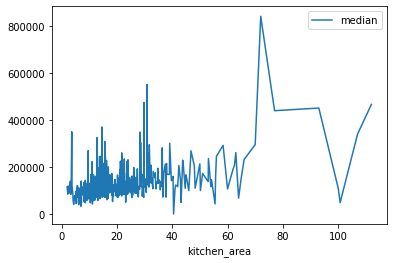

In [414]:
kitchen_area_to_price = data.pivot_table(index=['kitchen_area'], values='one_metr_price', aggfunc= ['mean', 'count', 'median'])
kitchen_area_to_price.columns = ['mean', 'count', 'median']
display(kitchen_area_to_price.sort_values(by='median', ascending=False))
kitchen_area_to_price.plot(y='median')


*наблюдаем аналогичную зависимость, что и в прошлом примере*

,mean,count,median
rooms,,,
12,466666.670000,1,466666.670
8,196426.157143,7,116056.490
7,191922.699706,34,111552.675
15,110169.490000,1,110169.490
0,108135.662761,163,105555.560
10,104828.540000,2,104828.540
6,155674.330476,63,100529.100
1,99614.680656,6524,99505.390
5,130331.804301,193,95613.050


<AxesSubplot:xlabel='rooms'>

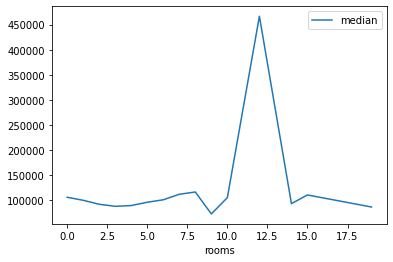

In [415]:
rooms_to_price = data.pivot_table(index='rooms', values='one_metr_price', aggfunc = ['mean', 'count', 'median'])
rooms_to_price.columns = ['mean', 'count', 'median']
display(rooms_to_price.sort_values(by='median', ascending=False))
rooms_to_price.plot(y='median')


,mean,count,median
floor_type,,,
другой,101104.881572,13485,96881.96
последний,91782.361689,2463,87179.49
первый,79980.784982,2182,80283.78


<AxesSubplot:xlabel='floor_type'>

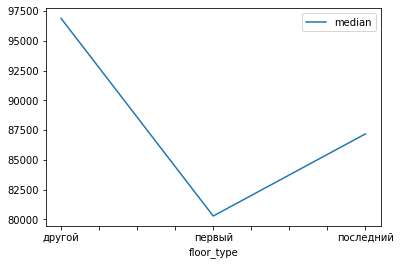

In [416]:
type_floor_to_price = data.pivot_table(index='floor_type', values='one_metr_price', aggfunc = ['mean', 'count', 'median'])
type_floor_to_price.columns = ['mean', 'count', 'median']
display(type_floor_to_price.sort_values(by='median', ascending=False))
type_floor_to_price.plot(y='median')

**видно, что первые этажи стоят дешевле других примерно на 15000р, что составляет около 15%, последние чуть дооже первых но не намного (87500-82500)82500=6.06 %.**

,mean,count,median
weekday,,,
1,97195.932682,3192,94589.435
2,97666.461395,3010,94381.240
3,97160.351326,3288,94107.845
0,97183.105955,2727,93750.000
6,96325.513338,1291,93714.290
4,96778.420300,3130,93145.390
5,99194.124256,1492,93109.825


<AxesSubplot:xlabel='weekday'>

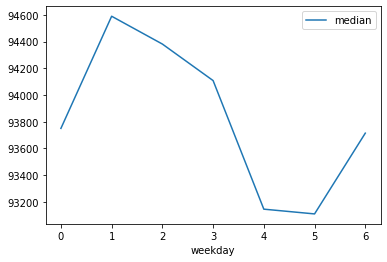

In [417]:
date_to_price = data.pivot_table(index='weekday', values='one_metr_price', aggfunc = ['mean', 'count', 'median'])
date_to_price.columns = ['mean', 'count', 'median']
display(date_to_price.sort_values(by='median', ascending=False))
date_to_price.plot(y='median')

*Стоимость больше в начале недели, чем в конце, что обьясняется активностью покупателей в рабочую неделю, в выходные народ обычно отдыхает*

,mean,count,median
month,,,
9,100257.825187,1635,95348.840
8,97562.190733,1473,95321.510
11,97934.176218,1925,95000.000
3,97128.880141,1701,94662.410
1,96156.961570,1134,94379.955
7,98595.884000,1425,94300.520
2,96330.699812,2075,93750.000
10,95488.643076,1739,93191.490
4,98874.346249,1309,93093.090


<AxesSubplot:xlabel='month'>

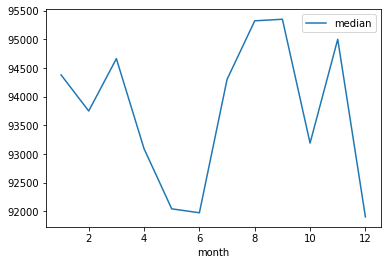

In [418]:
date_to_price = data.pivot_table(index='month', values='one_metr_price', aggfunc = ['mean', 'count', 'median'])
date_to_price.columns = ['mean', 'count', 'median']
display(date_to_price.sort_values(by='median', ascending=False))
date_to_price.plot(y='median')

*С апреля по июнь наблюдается спад, что можно обьяснить межсезоньем и майскими праздниками, рост виден в летние месцы с июня по август, так как люди готовятся к учебному году(много студентов, нуждающихся в квартирах),  а далее осенью наблюдается спад цены из за снижения спроса*

In [419]:
data['locality_name'].head(30)

1                 шушары
3        санкт-петербург
4        санкт-петербург
5     городской  янино-1
6              парголово
8                 мурино
9        санкт-петербург
10       санкт-петербург
11             ломоносов
12             сертолово
13              петергоф
14                пушкин
15       санкт-петербург
16       санкт-петербург
18       санкт-петербург
19       санкт-петербург
20             парголово
21       санкт-петербург
22               кудрово
24       санкт-петербург
25       санкт-петербург
26       санкт-петербург
27       санкт-петербург
28                пушкин
29       санкт-петербург
30              коммунар
31       санкт-петербург
32       санкт-петербург
33               колпино
34       санкт-петербург
Name: locality_name, dtype: object

,mean,count,median
year,,,
2019,106569.656888,964,104358.760
2018,96803.440007,7293,95263.160
2017,96542.262506,7343,91935.480
2016,97277.836814,2078,91562.665
2015,97795.446858,452,90438.895


<AxesSubplot:xlabel='year'>

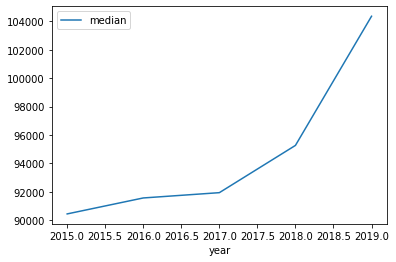

In [420]:
date_to_price = data.pivot_table(index='year', values='one_metr_price', aggfunc = ['mean', 'count', 'median'])
date_to_price.columns = ['mean', 'count', 'median']
display(date_to_price.sort_values(by='median', ascending=False))
date_to_price.plot(y='median')

*наибольшие цены были в 2014г и в 2019, c 2015 по 2017 в целом был спад*

**Евгени я ведь сделал это задание, сначала нашел топ 10 по количеству обьявлений а потом нашел пункт с мин и мак ценами. к этому задания есть вопросы еще?**

**востановил, тут верно все?**

In [438]:
mean_price = data.pivot_table(index='locality_name', values='last_price', aggfunc=['count'])
mean_price.columns = ['count']
mean_price = mean_price.sort_values(by='count', ascending=False).head(10)
print(mean_price)
mean_price['one_metr_price'] = data.pivot_table(index='locality_name', values='one_metr_price').round(2)
display(mean_price.sort_values(by='one_metr_price', ascending=False))


                 count
locality_name         
санкт-петербург  11970
 мурино            496
кудрово            388
 шушары            378
всеволожск         301
колпино            281
 парголово         271
пушкин             268
гатчина            233
выборг             187


,count,one_metr_price
locality_name,,
санкт-петербург,11970,111661.04
пушкин,268,101289.91
кудрово,388,94532.02
парголово,271,88687.72
мурино,496,85995.29
шушары,378,77995.41
колпино,281,74624.73
всеволожск,301,68735.66
гатчина,233,68004.78


**в топ 10 по количеству обьявлени лидирует спб, он же лидирует и по само большо цене за кв .м. в 111611,04р, самая же низкая цена в выборге- 57113.90р**

In [421]:
data.query('locality_name == "санкт-петербург"')['distance_city_centers'].describe()

count    11970.000000
mean        11.857226
std          4.765510
min          0.000000
25%          9.000000
50%         12.000000
75%         15.000000
max         29.000000
Name: distance_city_centers, dtype: float64

<AxesSubplot:xlabel='distance_city_centers'>

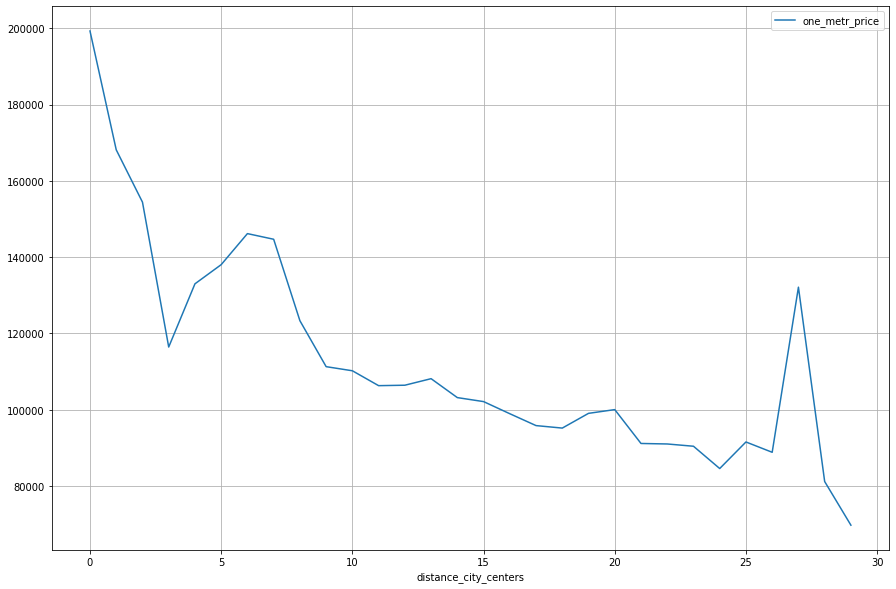

In [422]:
data.query('locality_name == "санкт-петербург"').pivot_table(index='distance_city_centers', values='one_metr_price').plot(figsize=(15, 10), grid=True)

**Можно сделать вывод, что при удаленности квартир от центра города до 3хкм цена кв метра сначала падает с 250000 до 125000, затем наблюдается рост цены при удаленности от 3 до 7км с  125000 до 150000, что обьясняется более высокой населенностью в сравнении с самым центром городаю. Далее идет плавное снижение цены с каждым км удаленности от центра города, что обьясняется тем, что квартиры на окраинах стоят дешевле чем около центра города.**

### Напишите общий вывод

***Мы провели полноценное исслеование рыночной стоимости жилой недвижимости в Санкт-Петербурге. В ходе исследования мы исследовали параметры, влияющие на конечную стоимость квартир и установили их зависимость на рыночную цену. Это общая площадь квартир, жилая площадь, площадь кухни, количество комнат, этаж, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год).и установили их зависимость.
Мы пришли к выводу, что среднестатистическое предложение= это квартира с общей площадью вв 60кв.м, жилой площадью 34кв.м. , с кухней в 6 квадратов, c высотой потолка в 2.7 метра, 2х комнатная, и расположенная не на первом и не на последнем этажах***

**Тоесть мне осталось сделать общи вывод и заменить выбросы медианой , а какие то отавить чтобы общее количество удаленных выбросов не ыло больше 10проц датафрейма?**

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [ ]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [ ]  Найдены пропущенные значения.
- [ ]  Пропущенные значения заполнены там, где это возможно.
- [ ]  Объяснено, какие пропущенные значения обнаружены.
- [ ]  В каждом столбце установлен корректный тип данных.
- [ ]  Объяснено, в каких столбцах изменён тип данных и почему.
- [ ]  Устранены неявные дубликаты в названиях населённых пунктов.
- [ ]  Обработаны редкие и выбивающиеся значения (аномалии).
- [ ]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [ ]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [ ]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [ ]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [ ]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [ ]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [ ]  На каждом этапе сделаны промежуточные выводы.
- [ ]  В конце проекта сделан общий вывод.